# Loan Prediction Project

#### Steps used:
    
1> Data cleansing and Wrangling
2> Define the metrics for which model is getting optimized.
3> Feature Engineering
4> Data Pre-processing
5> Feature Selection
6> Split the data into training and test data sets.
7> Model Selection
8> Model Validation 
9> Interpret the result
10> save Model
11> reload model for prediction of test .csv
12>do data cleaning for test.csv
13> predict Fees

## Importing Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('loan_prediction.csv')

In [4]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
data.shape

(614, 13)

In [7]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [16]:
print("Number of Categories: ")
for ColName in data[['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Property_Area', 'Loan_Status']]:
    print("{} = {}".format(ColName,len(data[ColName].unique())))

Number of Categories: 
Loan_ID = 614
Gender = 2
Married = 2
Dependents = 4
Education = 2
Self_Employed = 2
Property_Area = 3
Loan_Status = 2


Observation: This represents number of categories of particular type of data.
    As, Loan_Status which is going to be target variable is having 2 types of data so one will be using Logistic Regression

## Logistic Regression Kind of technique need to resolve this problem

# EDA Process

In [8]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Min - Max: As there is alot of diffrence between min-max one need to do is scaling of data.

## Checking null value in dataset

In [10]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Handling null values

In [13]:
#1. Function to replace NAN values with mode value this both rows are categorical,
#not numeric based with datatype of float or int
def impute_nan_most_frequent_category(data,ColName):
    # .mode()[0] - gives first category name
     most_frequent_category=data[ColName].mode()[0]
    
    # replace nan values with most occured category
     #data[ColName + "_Imputed"] = data[ColName]
     #data[ColName + "_Imputed"].fillna(most_frequent_category,inplace=True)
     data[ColName] = data[ColName]
     data[ColName].fillna(most_frequent_category,inplace=True)

In [14]:
#2. Call function to impute most occured category
for Columns in ['Gender','Married','Dependents','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History']:
    impute_nan_most_frequent_category(data,Columns)
    
# Display imputed result
data[['Gender','Married','Dependents','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History']].head(10)

,Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History
0,Male,No,0,No,120.0,360.0,1.0
1,Male,Yes,1,No,128.0,360.0,1.0
2,Male,Yes,0,Yes,66.0,360.0,1.0
3,Male,Yes,0,No,120.0,360.0,1.0
4,Male,No,0,No,141.0,360.0,1.0
5,Male,Yes,2,Yes,267.0,360.0,1.0
6,Male,Yes,0,No,95.0,360.0,1.0
7,Male,Yes,3+,No,158.0,360.0,0.0
8,Male,Yes,2,No,168.0,360.0,1.0
9,Male,Yes,1,No,349.0,360.0,1.0


In [15]:
#Rechecking null values in dataset 
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

null values are handled

# Data Cleaning

In [17]:
data.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.745407
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

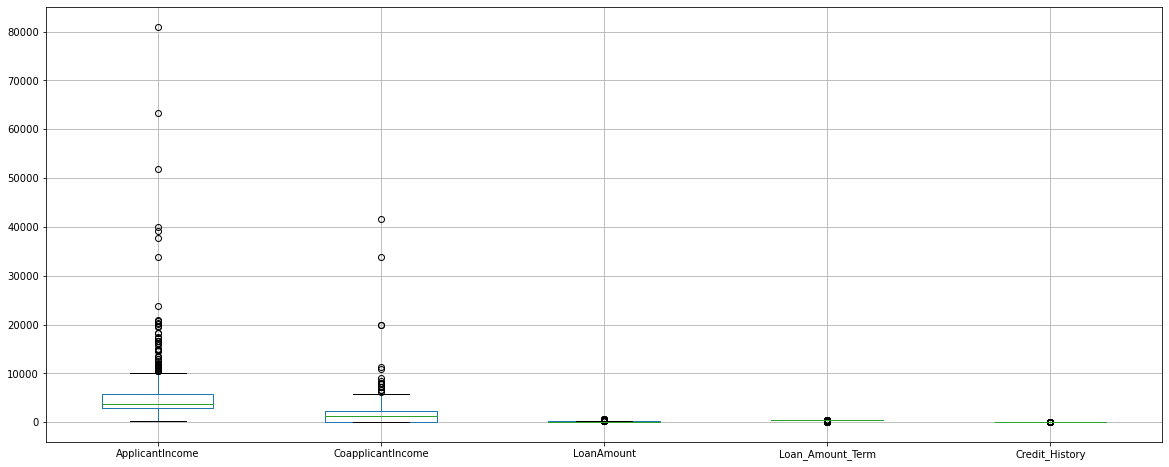

In [18]:
#checking for outliers
data.iloc[:,:].boxplot(figsize=[20,8])
plt.show()

There is alot of skewness and outliers present

# Encoding

In [19]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [20]:
for i in data.columns:
    if data[i].dtypes == "object":
        data[i]=enc.fit_transform(data[i].values.reshape(-1,1))

In [21]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,0.0,0.0,0.0,5849,0.0,120.0,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0.0
2,2.0,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0,1.0
3,3.0,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0,1.0
4,4.0,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609.0,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.0,360.0,1.0,0.0,1.0
610,610.0,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.0,180.0,1.0,0.0,1.0
611,611.0,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.0,360.0,1.0,2.0,1.0
612,612.0,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.0,360.0,1.0,2.0,1.0


## Corelation of feature variable with the target variable

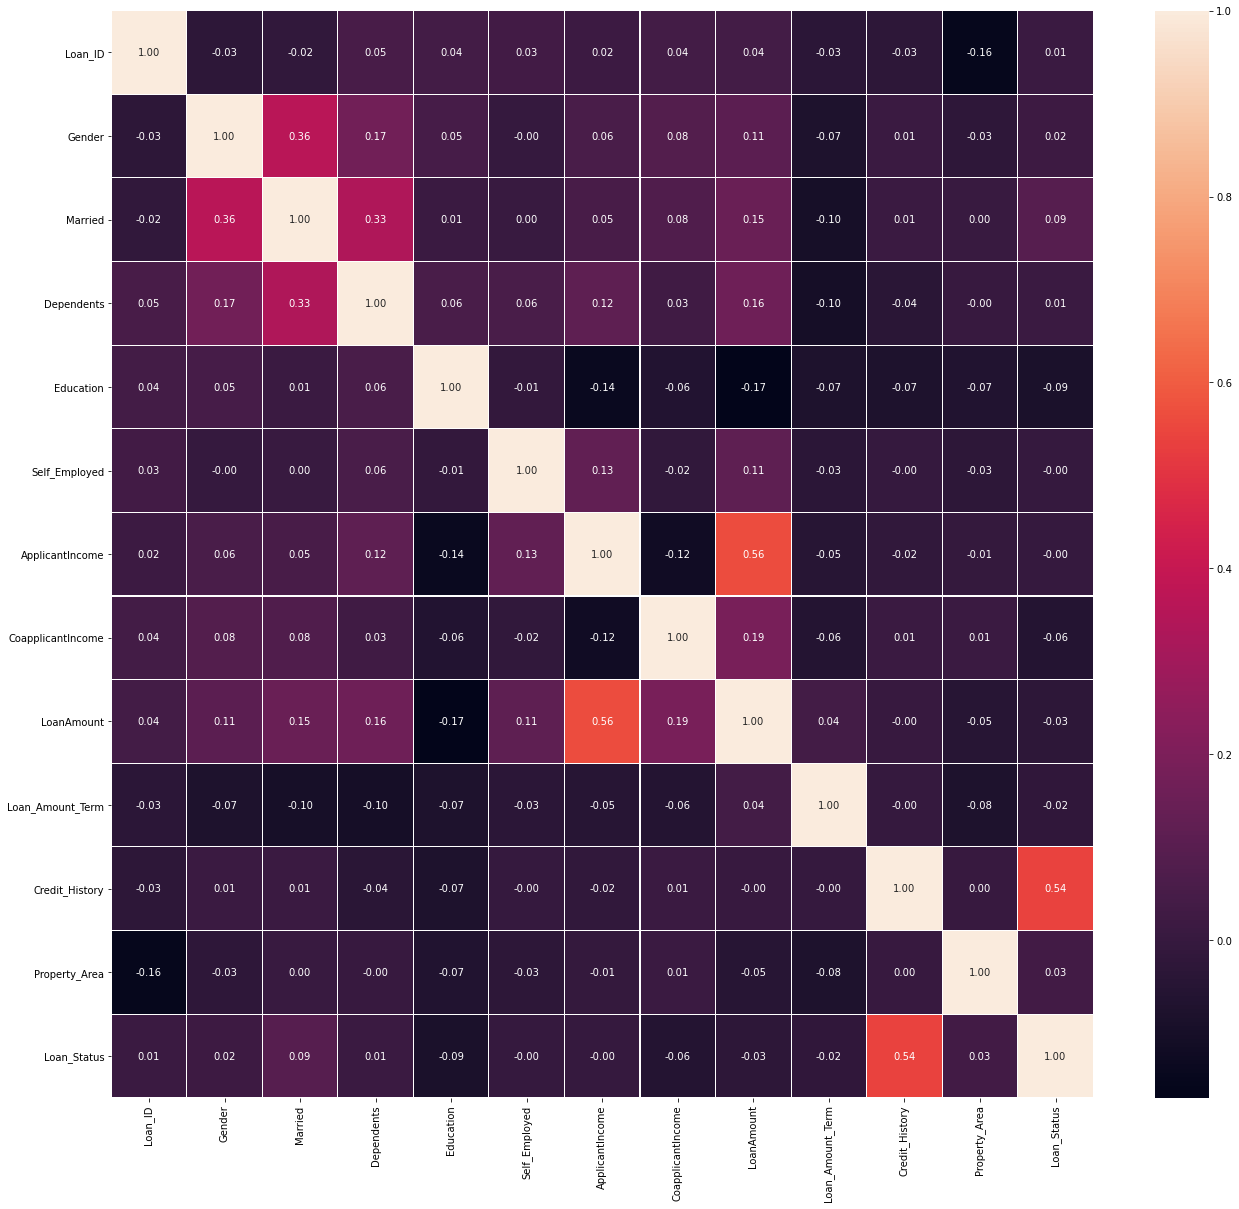

In [22]:
corr_matrix_hmap=data.corr()
plt.figure(figsize=(22,20))
sns.heatmap(corr_matrix_hmap,annot=True,linewidths=0.1,fmt="0.2f")
plt.show()

In [23]:
corr_matrix_hmap["Loan_Status"].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.540556
Married              0.091478
Property_Area        0.032112
Gender               0.017987
Loan_ID              0.011773
Dependents           0.010118
Self_Employed       -0.003700
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.022549
LoanAmount          -0.031808
CoapplicantIncome   -0.059187
Education           -0.085884
Name: Loan_Status, dtype: float64

Most highly corelated variavle is : Credit_History

Least is: Education

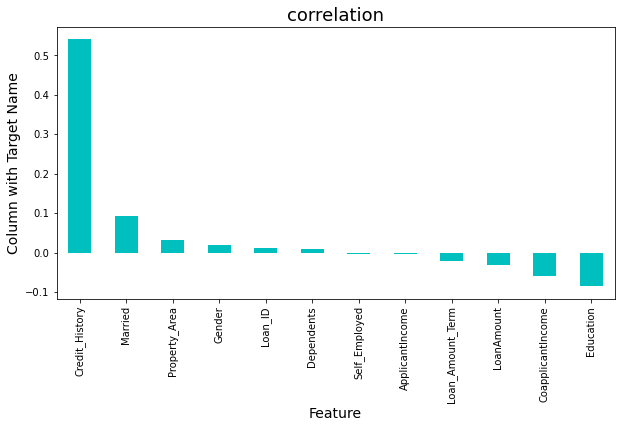

In [24]:
plt.figure(figsize=(10,5))
data.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Column with Target Name',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()


## Outliers 

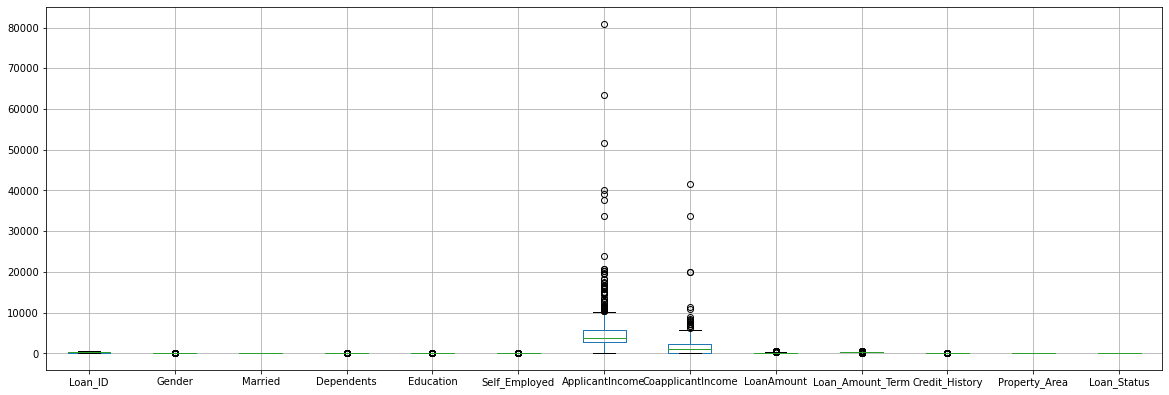

In [25]:
#checking for outliers
data.iloc[:,:].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

ApplicantIncome is having max outliers

### Handling outliers

In [26]:
# Removing Outliers
from scipy.stats import zscore
z= np.abs(zscore(data))
z

array([[1.72923217, 0.47234264, 1.37208932, ..., 0.41173269, 1.22329839,
        0.67451931],
       [1.7235903 , 0.47234264, 0.72881553, ..., 0.41173269, 1.31851281,
        1.48253724],
       [1.71794844, 0.47234264, 0.72881553, ..., 0.41173269, 1.22329839,
        0.67451931],
       ...,
       [1.71794844, 0.47234264, 0.72881553, ..., 0.41173269, 1.22329839,
        0.67451931],
       [1.7235903 , 0.47234264, 0.72881553, ..., 0.41173269, 1.22329839,
        0.67451931],
       [1.72923217, 2.11710719, 1.37208932, ..., 2.42876026, 0.04760721,
        1.48253724]])

In [27]:
threshold = 3
print(np.where(z<3))

(array([  0,   0,   0, ..., 613, 613, 613], dtype=int64), array([ 0,  1,  2, ..., 10, 11, 12], dtype=int64))


In [28]:
#removing outliers
data_new = data[(z<3).all(axis=1)]

In [29]:
data.shape

(614, 13)

In [30]:
#After removing outliers
data_new.shape

(577, 13)

In [31]:
data=data_new
data.shape

(577, 13)

In [32]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,0.0,0.0,0.0,5849,0.0,120.0,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0.0
2,2.0,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0,1.0
3,3.0,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0,1.0
4,4.0,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609.0,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.0,360.0,1.0,0.0,1.0
610,610.0,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.0,180.0,1.0,0.0,1.0
611,611.0,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.0,360.0,1.0,2.0,1.0
612,612.0,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.0,360.0,1.0,2.0,1.0


Outliers are been handled

# Seperating Independent Variables and Target Variables

In [33]:
# x= independent variable
x = data.iloc[:,0:-1]
x.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.0,1.0,0.0,0.0,0.0,0.0,5849,0.0,120.0,360.0,1.0,2.0
1,1.0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0
2,2.0,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0
3,3.0,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0
4,4.0,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0


In [35]:
#y = target variable = Loan_Status
y = data.iloc[:,-1]
y.head()

0    1.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: Loan_Status, dtype: float64

In [36]:
x.shape

(577, 12)

In [37]:
y.shape

(577,)

### Rechecking skewness after removing outliers

In [38]:
x.skew()

Loan_ID              0.010879
Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.163426
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
dtype: float64

Max skewness= Self_Employed then , Applicant Income and then,so on

In [40]:
x.dtypes

Loan_ID              float64
Gender               float64
Married              float64
Dependents           float64
Education            float64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
dtype: object

### Handling Skewness

In [41]:
#Method for removing skew

from sklearn.preprocessing import power_transform
z = power_transform(x[0:])
data_new= pd.DataFrame(z,columns=x.columns)

In [42]:
x = data_new

In [43]:
#after removing skewness
x.skew()

Loan_ID             -0.284298
Gender              -1.622920
Married             -0.630211
Dependents           0.478360
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.047768
Loan_Amount_Term     0.727533
Credit_History      -1.976043
Property_Area       -0.155094
dtype: float64

As after checking corelation and skewness, Self_Employed is not that much corelated infact negatively corelated, so one cant drop that column

# Visualizations

In [44]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

1.0    398
0.0    179
Name: Loan_Status, dtype: int64


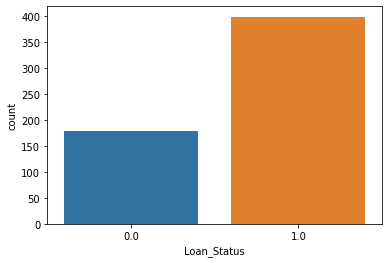

In [45]:
import seaborn as sns
alpha = sns.countplot(x="Loan_Status",data=data)
print(data["Loan_Status"].value_counts())

Loan_Status which is out target variable contains 2 values, 0 and 1

In [46]:
df_visual= x[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']].copy()

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

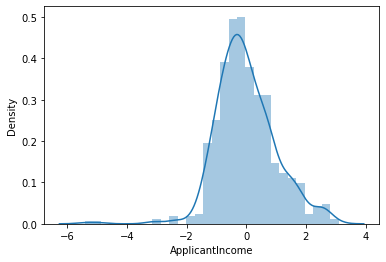

In [47]:
import seaborn as sns
sns.distplot(df_visual['ApplicantIncome'],kde=True)

In [49]:
x['ApplicantIncome'].describe()

count    5.770000e+02
mean     6.441025e-16
std      1.000868e+00
min     -5.415672e+00
25%     -6.287963e-01
50%     -1.282227e-01
75%      5.791209e-01
max      3.096269e+00
Name: ApplicantIncome, dtype: float64

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

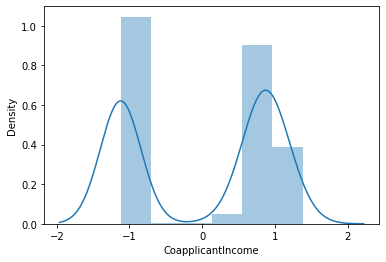

In [50]:
sns.distplot(df_visual['CoapplicantIncome'],kde=True)

Overfitting is present here

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

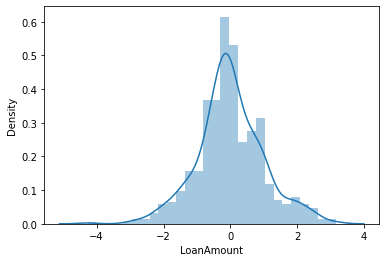

In [51]:
sns.distplot(df_visual['LoanAmount'],kde=True)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

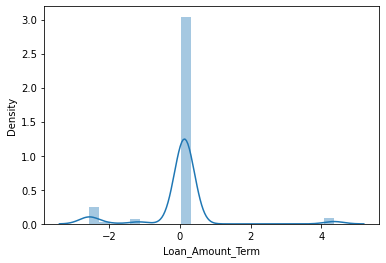

In [52]:
sns.distplot(df_visual['Loan_Amount_Term'],kde=True)

here overfitting is present in more quantity

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

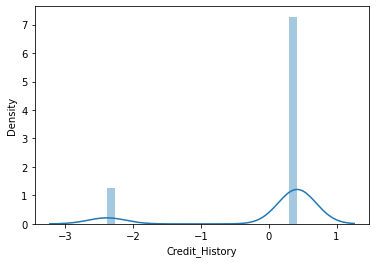

In [53]:
sns.distplot(df_visual['Credit_History'],kde=True)

Here also overfitting is there

# Scaling

In [57]:
x.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,5.770000e+02,5.770000e+02,5.770000e+02,5.770000e+02,5.770000e+02,5.770000e+02,5.770000e+02,5.770000e+02,5.770000e+02,5.770000e+02,5.770000e+02,5.770000e+02
mean,4.248479e-16,-1.677841e-16,-1.558545e-16,-2.064592e-16,-3.559641e-16,9.158859e-17,6.441025e-16,5.926320e-17,-2.919867e-17,1.414236e-17,6.657490e-16,8.102031e-16
std,1.000868e+00,1.000868e+00,1.000868e+00,1.000868e+00,1.000868e+00,1.000868e+00,1.000868e+00,1.000868e+00,1.000868e+00,1.000868e+00,1.000868e+00,1.000868e+00
min,-2.159166e+00,-2.095835e+00,-1.362511e+00,-8.092427e-01,-5.419612e-01,-3.805802e-01,-5.415672e+00,-1.122446e+00,-4.273625e+00,-2.562700e+00,-2.389415e+00,-1.340199e+00
25%,-7.914167e-01,4.771369e-01,-1.362511e+00,-8.092427e-01,-5.419612e-01,-3.805802e-01,-6.287963e-01,-1.122446e+00,-5.646245e-01,1.307882e-01,4.185125e-01,-1.340199e+00
50%,9.552567e-02,4.771369e-01,7.339391e-01,-8.092427e-01,-5.419612e-01,-3.805802e-01,-1.282227e-01,6.833168e-01,-6.765844e-02,1.307882e-01,4.185125e-01,1.546372e-02
75%,8.592969e-01,4.771369e-01,7.339391e-01,9.028685e-01,-5.419612e-01,-3.805802e-01,5.791209e-01,8.800900e-01,5.670444e-01,1.307882e-01,4.185125e-01,1.194806e+00
max,1.566902e+00,4.771369e-01,7.339391e-01,1.533596e+00,1.845150e+00,2.627567e+00,3.096269e+00,1.382080e+00,3.146249e+00,4.360131e+00,4.185125e-01,1.194806e+00


In [58]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [59]:
x=mms.fit_transform(x)

In [60]:
x

array([[0.        , 1.        , 0.        , ..., 0.38907323, 1.        ,
        1.        ],
       [0.00690885, 1.        , 1.        , ..., 0.38907323, 1.        ,
        0.        ],
       [0.0128215 , 1.        , 1.        , ..., 0.38907323, 1.        ,
        1.        ],
       ...,
       [0.99767872, 1.        , 1.        , ..., 0.38907323, 1.        ,
        1.        ],
       [0.99883964, 1.        , 1.        , ..., 0.38907323, 1.        ,
        1.        ],
       [1.        , 0.        , 0.        , ..., 0.38907323, 0.        ,
        0.53477707]])

# Model Training

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state = 42)


In [62]:
x_train.shape

(386, 12)

In [63]:
y_train.shape

(386,)

In [64]:
x_test.shape

(191, 12)

In [65]:
y_test.shape

(191,)

In [66]:
y_train

517    0.0
21     1.0
182    1.0
444    1.0
58     1.0
      ... 
74     1.0
110    1.0
285    1.0
459    0.0
106    1.0
Name: Loan_Status, Length: 386, dtype: float64

In [67]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()

In [68]:
lm.fit(x_train,y_train)

LogisticRegression()

In [69]:
lm.score(x_train,y_train)

0.8082901554404145

### Prediction

In [70]:
#predict the values
pred=lm.predict(x_test)
print("Predicted Allitation",pred)
print("Actual Allitation",y_test)

Predicted Allitation [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0.
 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0.]
Actual Allitation 122    1.0
414    0.0
544    1.0
105    1.0
461    1.0
      ... 
447    0.0
118    0.0
148    0.0
587    1.0
7      0.0
Name: Loan_Status, Length: 191, dtype: float64


In [71]:
print('Accuracy Score:',accuracy_score(y_test,pred))

Accuracy Score: 0.837696335078534


# Finding Best Random State

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc =accuracy_score(y_test,predrf)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
        
print("Best score is: ",maxAccu,"on Random_state",maxRS)

Best score is:  0.8900523560209425 on Random_state 12


### Train-Test Model based on Random State

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state = 12)
LR = LogisticRegression()
LR.fit(x_train,y_train)
predrf = LR.predict(x_test)

In [79]:
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report
print('Accuracy Score:', accuracy_score(y_test,predrf))
print('Confusion Matrix:', confusion_matrix(y_test,predrf))
print('Classification Report:', classification_report(y_test,predrf))

Accuracy Score: 0.8900523560209425
Confusion Matrix: [[ 28  20]
 [  1 142]]
Classification Report:               precision    recall  f1-score   support

         0.0       0.97      0.58      0.73        48
         1.0       0.88      0.99      0.93       143

    accuracy                           0.89       191
   macro avg       0.92      0.79      0.83       191
weighted avg       0.90      0.89      0.88       191



In [80]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print('Accuracy Score:', accuracy_score(y_test,preddt))
print('Confusion Matrix:', confusion_matrix(y_test,preddt))
print('Classification Report:', classification_report(y_test,preddt))

Accuracy Score: 0.6910994764397905
Confusion Matrix: [[33 15]
 [44 99]]
Classification Report:               precision    recall  f1-score   support

         0.0       0.43      0.69      0.53        48
         1.0       0.87      0.69      0.77       143

    accuracy                           0.69       191
   macro avg       0.65      0.69      0.65       191
weighted avg       0.76      0.69      0.71       191



In [81]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc = rfc.predict(x_test)
print('Accuracy Score:', accuracy_score(y_test,predrfc))
print('Confusion Matrix:', confusion_matrix(y_test,predrfc))
print('Classification Report:', classification_report(y_test,predrfc))

Accuracy Score: 0.837696335078534
Confusion Matrix: [[ 29  19]
 [ 12 131]]
Classification Report:               precision    recall  f1-score   support

         0.0       0.71      0.60      0.65        48
         1.0       0.87      0.92      0.89       143

    accuracy                           0.84       191
   macro avg       0.79      0.76      0.77       191
weighted avg       0.83      0.84      0.83       191



In [82]:
from sklearn import svm
svm = svm.SVC()
svm.fit(x_train,y_train)
predsvm = svm.predict(x_test)
print('Accuracy Score:', accuracy_score(y_test,predsvm))
print('Confusion Matrix:', confusion_matrix(y_test,predsvm))
print('Classification Report:', classification_report(y_test,predsvm))

Accuracy Score: 0.8848167539267016
Confusion Matrix: [[ 27  21]
 [  1 142]]
Classification Report:               precision    recall  f1-score   support

         0.0       0.96      0.56      0.71        48
         1.0       0.87      0.99      0.93       143

    accuracy                           0.88       191
   macro avg       0.92      0.78      0.82       191
weighted avg       0.89      0.88      0.87       191



In [83]:


pred_train = LR.predict(x_train)
pred_test =LR.predict(x_test) 
Train_accuracy = accuracy_score(y_train,pred_train)
Test_accuracy = accuracy_score(y_test,pred_test)
maxAccu=0
maxRS=0


from sklearn.model_selection import cross_val_score
for j in range(2,16):
    cv_score=cross_val_score(LR,x,y,cv=j)
    cv_mean = cv_score.mean()
    if cv_mean > maxAccu:
        maxAccu = cv_mean
        maxRS = j
    print(f"At cross fold {j} cv score is {cv_mean} and accuracy score training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}")

        
        
    print("\n")
    
        
    
    
 
    

At cross fold 2 cv score is 0.8180627643214149 and accuracy score training is 0.7849740932642487 and accuracy for the testing is 0.8900523560209425


At cross fold 3 cv score is 0.8197682786413356 and accuracy score training is 0.7849740932642487 and accuracy for the testing is 0.8900523560209425


At cross fold 4 cv score is 0.8180316091954023 and accuracy score training is 0.7849740932642487 and accuracy for the testing is 0.8900523560209425


At cross fold 5 cv score is 0.8180809595202397 and accuracy score training is 0.7849740932642487 and accuracy for the testing is 0.8900523560209425


At cross fold 6 cv score is 0.8179947021764032 and accuracy score training is 0.7849740932642487 and accuracy for the testing is 0.8900523560209425


At cross fold 7 cv score is 0.8181646446412829 and accuracy score training is 0.7849740932642487 and accuracy for the testing is 0.8900523560209425


At cross fold 8 cv score is 0.818017503805175 and accuracy score training is 0.7849740932642487 and 

In [84]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(LR,x,y,cv=j)
cv_mean = cv_score.mean()
print("Cross validation score for Logistic Regression",cv_mean)

Cross validation score for Logistic Regression 0.8183085919928026


In [85]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(dt,x,y,cv=j)
cv_mean = cv_score.mean()
print("Cross validation score for Decision Tree",cv_mean)

Cross validation score for Decision Tree 0.704003598740441


In [86]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(rfc,x,y,cv=j)
cv_mean = cv_score.mean()
print("Cross validation score for Random Forest Classifier",cv_mean)

Cross validation score for Random Forest Classifier 0.7993702204228519


In [87]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(svm,x,y,cv=j)
cv_mean = cv_score.mean()
print("Cross validation score for Support Vector Machhine",cv_mean)

Cross validation score for Support Vector Machhine 0.8183085919928026


### Least the diffrence between Accuracy and cross validation, Best the model

#### Decision Tree and Random Forest shows max accuracy

%Accuracyscore = accuracy - crossvalidation

# Regularization

To mitigate the problem of overfitting and underfitting Regularization Methods are used: Lasso, Ridge or ElasticNet .

In [88]:
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')


In [89]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
parameters = {'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
EN=ElasticNet()
clf=GridSearchCV(EN,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.01, 'random_state': 0}


In [90]:
EN = ElasticNet(alpha=0.01,random_state=0)
EN.fit(x_train,y_train)
EN.score(x_train,y_train)
pred_EN=EN.predict(x_test)

lss= accuracy_score(y_test,pred_test)
lss

0.8900523560209425

In [91]:
#cross_validation_mean = cv_mean
#cross_validation_score= cv_score

cross_validation_score = cross_val_score(EN,x,y,cv=5)
cross_validation_mean = cross_validation_score.mean()
cross_validation_mean

0.3092353868443931

# Ensemble Technique

In [93]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':np.arange(2,15),'criterion':["gini","entrophy"]}

rf = DecisionTreeClassifier()
clf=GridSearchCV(rf,parameters,cv=5)
clf.fit(x_train,y_train)
print(clf.best_params_)



{'criterion': 'gini', 'max_depth': 2}


In [96]:
rf=DecisionTreeClassifier(criterion="gini",max_depth=2)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)

rfs = accuracy_score(y_test,pred_decision)
print('Accuracy Score:',rfs*100)

rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()

print("Cross Validation Score:",rfc*100)

#print(clf.best_params_)

Accuracy Score: 88.48167539267016
Cross Validation Score: 81.29085457271363


# Saving Model

In [97]:
import pickle
filename = "Loan_Prediction.pkl"
pickle.dump(rf,open(filename,"wb"))


# Conclusion

In [98]:
loaded_model=pickle.load(open('Loan_Prediction.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.8848167539267016


In [99]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,181,182,183,184,185,186,187,188,189,190
Predicted,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
Original,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0


# Our model shows 88% accuracy, which predicts the status of loan